In [5]:
import skrf as rf
from matplotlib import pyplot as plt
from skrf.calibration import OnePort
from skrf.calibration.calibration import TRL
from skrf import data
import numpy as np

#import the .snp
#5 port matrix b/c the thru/line/reflect were made on same ckt
ntwk = rf.Network('Project1_Circuit1.s5p')

S = ntwk.s

#keep it complex
thru_S = 1j*np.ones((1000,2,2))
line_S = 1j*np.ones((1000,2,2))
refl_S = 1j*np.zeros((1000,2,2))

thru_S[:,0,0] = S[:,0,0]
thru_S[:,0,1] = S[:,0,1]
thru_S[:,1,0] = S[:,1,0]
thru_S[:,1,1] = S[:,1,1]

line_S[:,0,0] = S[:,2,2]
line_S[:,0,1] = S[:,2,3]
line_S[:,1,0] = S[:,3,2]
line_S[:,1,1] = S[:,3,3]

refl_S[:,0,0] = S[:,4,4]

freq = rf.Frequency(2,6,1000,'ghz')

thru = rf.Network(name='Thru', frequency=freq, s=thru_S, z0=[ 50, 50 ])
line = rf.Network(name='Line', frequency=freq, s=line_S, z0=[ 50, 50 ])
refl = rf.Network(name='Refl', frequency=freq, s=refl_S, z0=[ 50, 50 ])

print("Thru: ", thru, "\n")
print("Line: ", line, "\n")
print("Reflect: ", refl, "\n")




Thru:  2-Port Network: 'Thru',  2-6 GHz, 1000 pts, z0=[50.+0.j 50.+0.j] 

Line:  2-Port Network: 'Line',  2-6 GHz, 1000 pts, z0=[50.+0.j 50.+0.j] 

Reflect:  2-Port Network: 'Refl',  2-6 GHz, 1000 pts, z0=[50.+0.j 50.+0.j] 



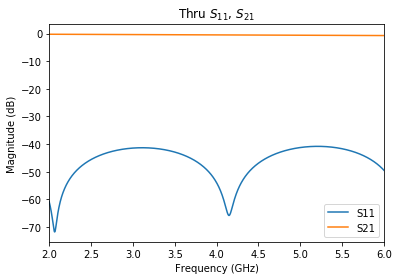

In [6]:
plt.title('Thru $S_{11}$, $S_{21}$')
thru.s11.plot_s_db(label='S11')
thru.s21.plot_s_db(label='S21')
plt.show()

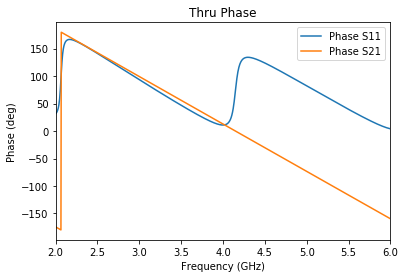

In [7]:
plt.title('Thru Phase')
thru.s11.plot_s_deg(label='Phase S11')
thru.s21.plot_s_deg(label='Phase S21')
plt.show()

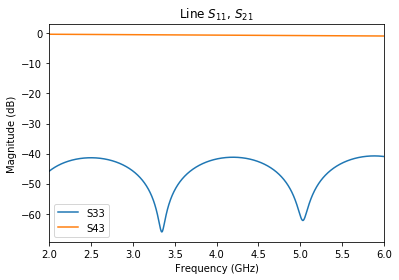

In [8]:
plt.title('Line $S_{11}$, $S_{21}$')
line.s11.plot_s_db(label='S33')
line.s21.plot_s_db(label='S43')
plt.show()

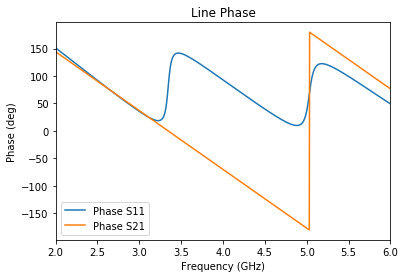

In [9]:
plt.title('Line Phase')
line.s11.plot_s_deg(label='Phase S11')
line.s21.plot_s_deg(label='Phase S21')
plt.show()

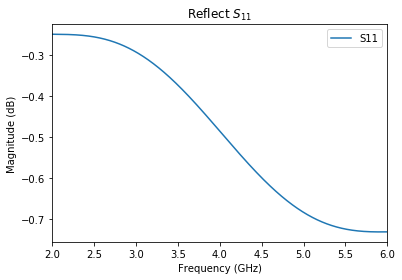

In [10]:
plt.title('Reflect $S_{11}$')
refl.s11.plot_s_db(label='S11')
plt.show()

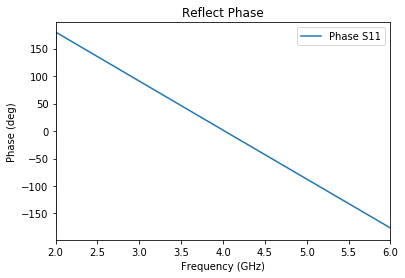

In [11]:
plt.title('Reflect Phase')
refl.s11.plot_s_deg(label='Phase S11')
plt.show()

In [12]:
measured = [thru, refl, line]

trl = TRL(measured=measured)

C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:2017: UserWarning: No switch terms provided
  warn('No switch terms provided')


C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:2108: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  error_vector_at_f, residuals_at_f = npy.linalg.lstsq(Q,M)[0:2]


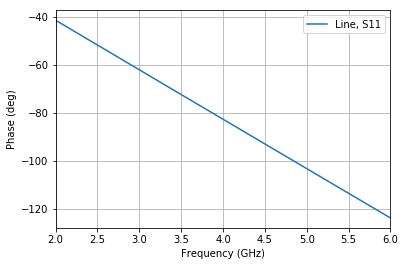

In [13]:
#dut_raw = rf.Network('Project1_Circuit2.s2p')

dut_cal = trl.apply_cal(line)

dut_cal.s12.plot_s_deg()
#line.plot_s_deg()
plt.grid()
plt.show()

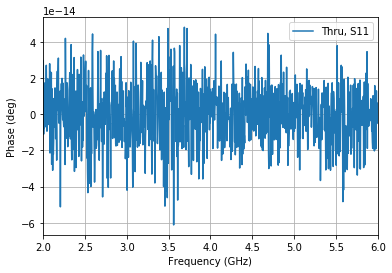

In [15]:
dut_T = trl.apply_cal(thru)

dut_T.s12.plot_s_deg()
plt.grid()
plt.show()